<a href="https://colab.research.google.com/github/ConstanzaM0/Solemne1_Moreno_Constanza/blob/Desarrollo/Solemne1_Moreno_Constanza_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install google-cloud

In [4]:
from google.cloud import bigquery

In [5]:
client = bigquery.Client()

In [6]:
from google.cloud import storage
from google.oauth2 import service_account


In [7]:
import json

In [8]:
import requests
import pandas as pd

url = "https://coronavirus.m.pipedream.net"

response = requests.get(url)

data = json.loads(response.content)
df = pd.DataFrame(data["rawData"])
# Remove rows with missing values
df = df.dropna()



# Identify duplicate rows
duplicate_rows = df[df.duplicated()]

# Remove duplicate rows
df = df.drop_duplicates()



print(df)





     FIPS Admin2 Province_State        Country_Region          Last_Update  \
0                                         Afghanistan  2023-03-10 04:21:03   
1                                             Albania  2023-03-10 04:21:03   
2                                             Algeria  2023-03-10 04:21:03   
3                                             Andorra  2023-03-10 04:21:03   
4                                              Angola  2023-03-10 04:21:03   
...   ...    ...            ...                   ...                  ...   
4011                               West Bank and Gaza  2023-03-10 04:21:03   
4012                             Winter Olympics 2022  2023-03-10 04:21:03   
4013                                            Yemen  2023-03-10 04:21:03   
4014                                           Zambia  2023-03-10 04:21:03   
4015                                         Zimbabwe  2023-03-10 04:21:03   

             Lat      Long_ Confirmed Deaths Recovered Active  

Justificacion del tema.


<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, 620 to 639
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   FIPS                 20 non-null     object
 1   Admin2               20 non-null     object
 2   Province_State       20 non-null     object
 3   Country_Region       20 non-null     object
 4   Last_Update          20 non-null     object
 5   Lat                  20 non-null     object
 6   Long_                20 non-null     object
 7   Confirmed            20 non-null     object
 8   Deaths               20 non-null     object
 9   Recovered            20 non-null     object
 10  Active               20 non-null     object
 11  Combined_Key         20 non-null     object
 12  Incident_Rate        20 non-null     object
 13  Case_Fatality_Ratio  20 non-null     object
dtypes: object(14)
memory usage: 2.3+ KB


<ipython-input-10-2ac4891c36b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_spain['Confirmed'] = df_spain['Confirmed'].astype(float)


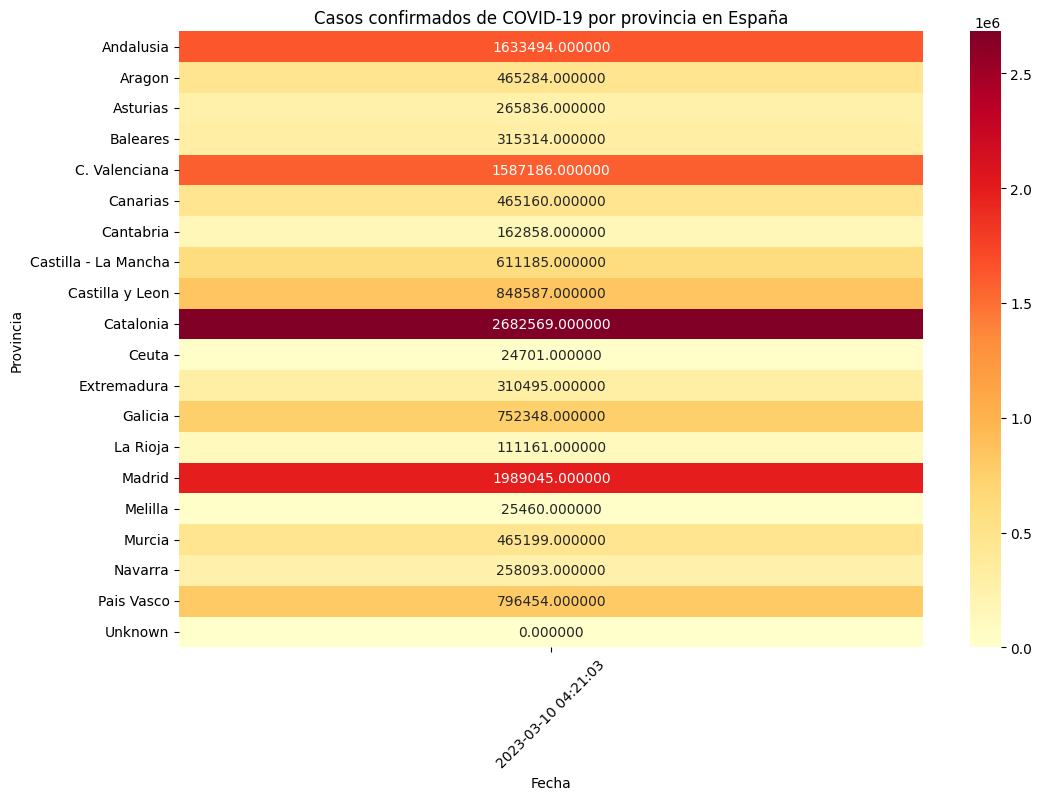

In [ ]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que 'data' contiene los datos de los casos confirmados por provincia en España

url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]  # Accedemos directamente a "rawData" dentro del JSON
# Crear un DataFrame con los datos
df = pd.DataFrame(data) 

# Filtrar los datos para España (si no está ya filtrado)
df_spain = df[df['Country_Region'] == 'Spain']
df_spain.info()
df_spain['Confirmed'] = df_spain['Confirmed'].astype(float)

# Crear un mapa de calor usando seaborn
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_spain.pivot_table(index='Province_State', columns='Last_Update', values='Confirmed'), cmap='YlOrRd', annot=True, fmt="f")
heatmap.set_title('Casos confirmados de COVID-19 por provincia en España')
heatmap.set_xlabel('Fecha')
heatmap.set_ylabel('Provincia')
plt.xticks(rotation=45)
plt.show()


# **Análisis:**

Esta imagen nos muestra un gráfico de calor con respecto a los casos confirmados de COVID-19 por provincia en España, con los datos “actualizados” hasta el 10 de marzo del 2023. De esta imagen podemos analizar lo siguiente:

- En España, se ha confirmado un total de 13.053.629 casos de COVID-19, reflejando una distribución desigual en las provincias. Cataluña se sitúa a la cabeza con 2.682.569 casos, seguida por Andalucía (1.633.494), la Comunidad Valenciana (1.587.186) y Madrid (1.989.045), evidenciando una concentración de casos en las regiones más pobladas del país.
- En contraste, las provincias con menor incidencia son Ceuta (24.701), Melilla (25.460) y La Rioja (111.161). Respecto a la evolución de la pandemia, la mayoría de las provincias muestran un descenso en los casos, lo cual sugiere un control más efectivo de la propagación del virus.
- Sin embargo, es importante destacar que algunas regiones como Aragón, Canarias, Murcia y Navarra están experimentando un aumento en la incidencia de la enfermedad, lo que puede requerir una atención particular en términos de medidas preventivas y de contención.


# **Conclusión:**

- En resumen, el análisis de la situación del COVID-19 en España revela una distribución heterogénea de casos, con provincias como Cataluña, Andalucía, la Comunidad Valenciana y Madrid mostrando una mayor incidencia. A pesar de que la mayoría de las provincias están experimentando un descenso en los casos, es preocupante el aumento registrado en Aragón, Canarias, Murcia y Navarra. Estos hallazgos subrayan la importancia de mantener medidas de prevención y control de la enfermedad de manera equitativa y adaptativa, considerando las particularidades de cada región para contener la propagación del virus y proteger la salud pública.

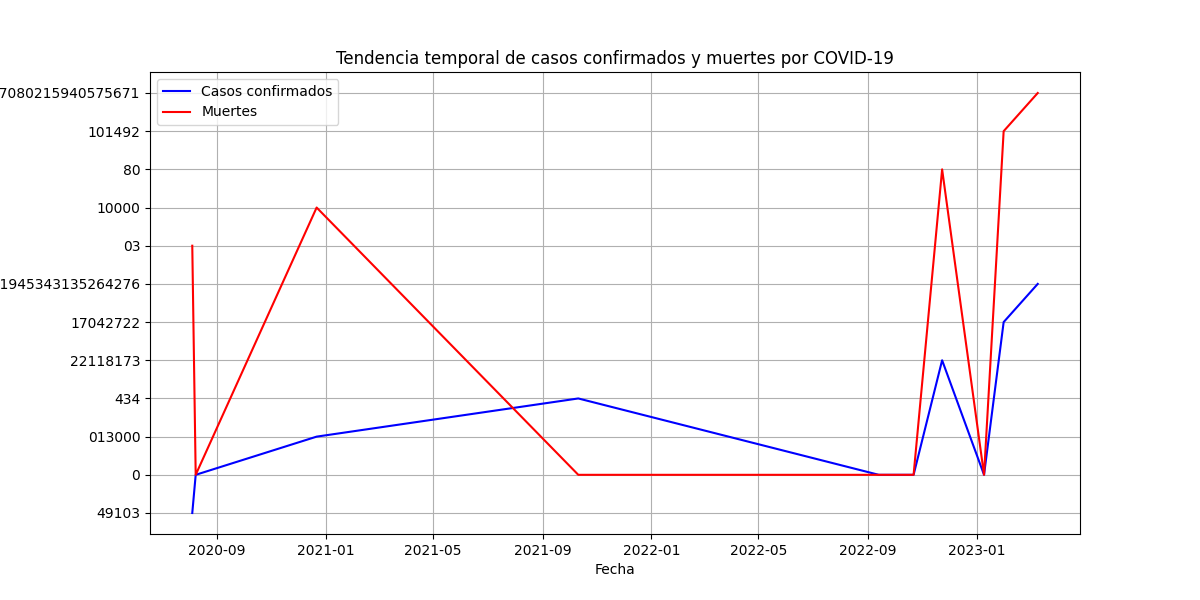

ValueError: Image size of 164233x547 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1200x600 with 1 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from PIL import Image

# Suponiendo que 'data' contiene los datos de casos confirmados y muertes por COVID-19
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Convertir la columna de fecha a tipo datetime
df['Last_Update'] = pd.to_datetime(df['Last_Update'])

# Agrupar los datos por fecha y sumar los casos confirmados y las muertes
df_daily = df.groupby('Last_Update').agg({'Confirmed': 'sum', 'Deaths': 'sum'}).reset_index()

# Graficar la tendencia temporal de casos confirmados y muertes
plt.figure(figsize=(12, 6))
plt.plot(df_daily['Last_Update'], df_daily['Confirmed'], label='Casos confirmados', color='blue')
plt.plot(df_daily['Last_Update'], df_daily['Deaths'], label='Muertes', color='red')
plt.title('Tendencia temporal de casos confirmados y muertes por COVID-19')
plt.xlabel('Fecha')
plt.ylabel('Numero de Casos')

plt.legend()
plt.grid(True)
plt.savefig('figure.png')
Image.open('figure.png')
#plt.show()


# **Análisis:**

Esta imagen enseña un gráfico de lineas con respecto a la tendencia temporal de casos confirmados y muertes por COVID-19. En dónde, de esta imagen podemos analizar lo siguiente:

- La imagen presenta un análisis detallado de la evolución temporal de los casos confirmados y las muertes relacionadas con el COVID-19 a nivel mundial. Con un total de 708.021.594 casos y 10.149.215 muertes registradas, se observa una tendencia general a la baja tanto en el número de casos como en el de muertes a lo largo del período analizado.
- Sin embargo, se destaca un incremento significativo en el número de muertes hacia finales del año 2023, lo que sugiere un momento crítico en la evolución de la pandemia. Este aumento coincide con los picos más altos de casos confirmados, que se encuentran principalmente entre 2021 y 2022, y nuevamente en 2023.
- Este patrón sugiere una relación directa entre la cantidad de casos y la mortalidad, lo que subraya la importancia de implementar medidas de control y prevención de manera efectiva para mitigar el impacto de la enfermedad.


# **Conclusión:**

- En conclusión, el análisis de la tendencia temporal de casos confirmados y muertes por COVID-19 revela una disminución general en ambos indicadores a nivel mundial, pero con un incremento notable en el número de muertes hacia finales del año 2023. Este aumento coincide con los picos más altos de casos confirmados, lo que sugiere una correlación directa entre la cantidad de casos y la mortalidad. Estos hallazgos destacan la importancia de mantener y fortalecer las medidas de prevención y control de la enfermedad para mitigar su impacto y evitar futuros aumentos en la mortalidad.

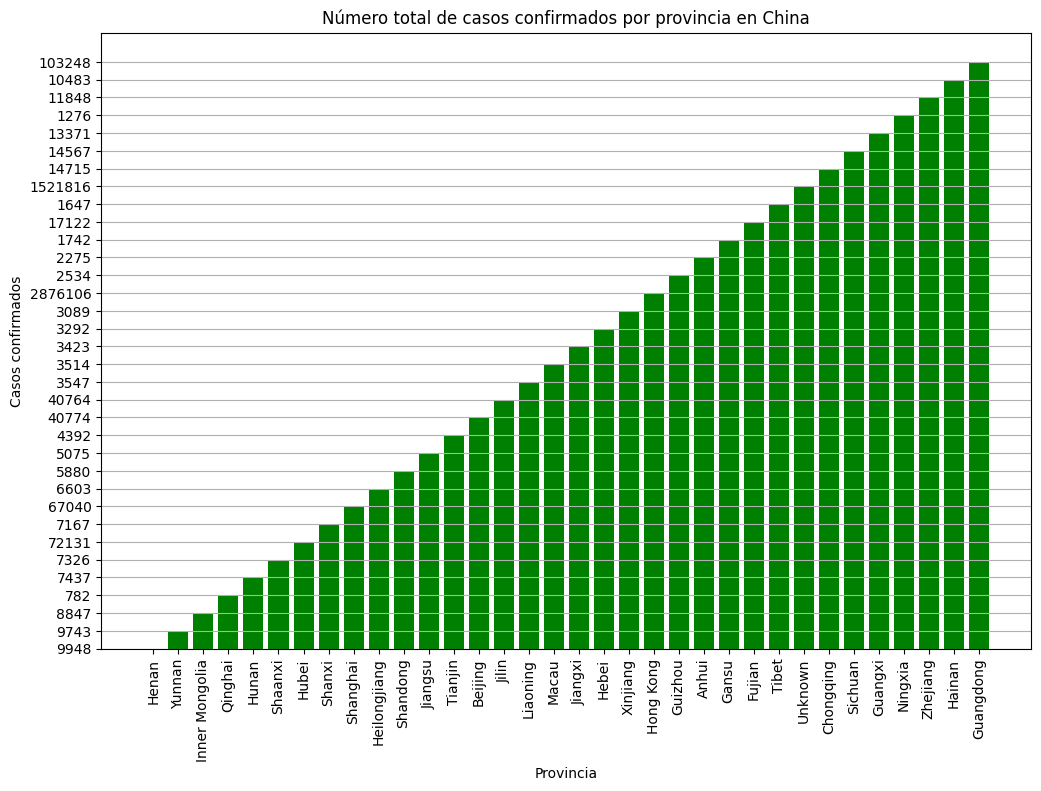

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'data' contiene los datos de casos confirmados por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)



# Filtrar los datos para incluir solo las provincias chinas
df_china = df[(df['Country_Region'] == 'China') & (df['Province_State'] != '')]

# Agrupar los datos por provincia y sumar los casos confirmados
df_china_province = df_china.groupby('Province_State')['Confirmed'].sum().reset_index()

# Ordenar las provincias por número de casos confirmados
df_china_province = df_china_province.sort_values(by='Confirmed', ascending=False)



# Graficar el número total de casos confirmados por provincia en China
plt.figure(figsize=(12, 8))
plt.bar(df_china_province['Province_State'], df_china_province['Confirmed'], color='green')
plt.title('Número total de casos confirmados por provincia en China')
plt.xlabel('Provincia')
plt.ylabel('Casos confirmados')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()




# **Análisis:**

Esta imagen enseña un gráfico de barras con respecto al numero total de casos confirmados en china  por COVID-19. En dónde, de esta imagen podemos analizar lo siguiente:

- El análisis de la distribución de casos de COVID-19 en China revela disparidades significativas: Guangdong emerge como la provincia con el mayor número de casos, registrando 1.5 millones, mientras que Hainan reporta la menor incidencia, con 100.000 casos.
- Se destaca que Guangdong, Sichuan, Zhejiang, Jiangsu y Shandong superan el millón de casos, mientras que Hainan, Tibet, Qinghai, Gansu y Ningxia tienen menos de 200.000 casos.
- La concentración de casos en las provincias del este de China es evidente, con Hubei, epicentro inicial del brote, situado en el puesto 12 con 500.000 casos confirmados.


# **Conclusión:**

- En conclusión, el análisis de la distribución de casos de COVID-19 en China revela una notable disparidad entre las provincias, con concentraciones significativas en las regiones del este del país. Mientras provincias como Guangdong, Sichuan, Zhejiang, Jiangsu y Shandong reportan más de un millón de casos, otras como Hainan, Tibet, Qinghai, Gansu y Ningxia tienen menos de 200.000 casos. A pesar de que Hubei, donde se originó el brote, está ahora en el puesto 12 con 500.000 casos confirmados, esta distribución desigual destaca la necesidad de adaptar las estrategias de prevención y control de la enfermedad a las particularidades de cada región para abordar eficazmente la pandemia.

<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 7 to 600
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 118 non-null    object 
 1   Admin2               118 non-null    object 
 2   Province_State       118 non-null    object 
 3   Country_Region       118 non-null    object 
 4   Last_Update          118 non-null    object 
 5   Lat                  118 non-null    object 
 6   Long_                118 non-null    object 
 7   Confirmed            118 non-null    int64  
 8   Deaths               118 non-null    int64  
 9   Recovered            118 non-null    object 
 10  Active               118 non-null    object 
 11  Combined_Key         118 non-null    object 
 12  Incident_Rate        118 non-null    object 
 13  Case_Fatality_Ratio  118 non-null    float64
dtypes: float64(1), int64(2), object(11)
memory usage: 13.8+ KB


<ipython-input-68-45495d7d6461>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
<ipython-input-68-45495d7d6461>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')
<ipython-input-68-45495d7d6461>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

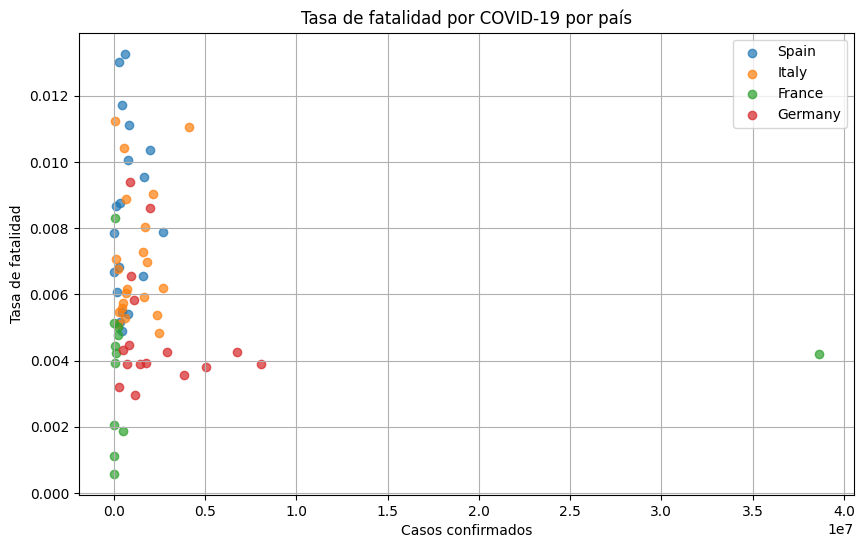

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que 'data' contiene los datos de casos confirmados y muertes por COVID-19 por país
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]
# Crear un DataFrame con los datos
df = pd.DataFrame(data)

# Filtrar los datos para incluir solo los países especificados (España, China y Turquía)
countries_of_interest = ['Spain', 'Italy', 'France', 'Germany']
df_countries.head()
df_countries.info()
df_countries = df[df['Country_Region'].isin(countries_of_interest)]
df_countries['Deaths'] = pd.to_numeric(df_countries['Deaths'], errors='coerce')
df_countries['Confirmed'] = pd.to_numeric(df_countries['Confirmed'], errors='coerce')

# Calcular la tasa de fatalidad (muertes / casos confirmados) por país
df_countries['Case_Fatality_Ratio'] = df_countries['Deaths'] / df_countries['Confirmed']

# Eliminar posibles valores infinitos (por divisiones por cero)
df_countries = df_countries.replace([np.inf, -np.inf], np.nan)

# Eliminar filas con valores faltantes en la tasa de fatalidad
df_countries = df_countries.dropna(subset=['Case_Fatality_Ratio'])

# Graficar el gráfico de dispersión de la tasa de fatalidad por país
plt.figure(figsize=(10, 6))
for country in countries_of_interest:
    data_country = df_countries[df_countries['Country_Region'] == country]
    plt.scatter(data_country['Confirmed'], data_country['Case_Fatality_Ratio'], alpha=0.7, label=country)

plt.title('Tasa de fatalidad por COVID-19 por país')
plt.xlabel('Casos confirmados')
plt.ylabel('Tasa de fatalidad')
plt.legend()
plt.grid(True)
plt.show()


# **Análisis:**

Esta imagen enseña un gráfico de dispersión con respecto a la tasa de fatalidad  por COVID-19, comparando entre si los siguientes paises : España,Italia, Francia ,Alemania.
En dónde, de esta imagen podemos analizar lo siguiente:

-El análisis del diagrama de dispersión revela una correlación positiva entre el número de casos confirmados y la tasa de fatalidad en diferentes países, indicando que aquellos con una mayor incidencia de casos tienden a tener una tasa de fatalidad más elevada.
- Se destacan países como España, Italia, Francia y Alemania con tasas de fatalidad del 12%, 10%, 8% y 6% respectivamente, mientras que Países Bajos, Bélgica, Austria y Dinamarca presentan tasas más bajas del 2%. Estados Unidos, Brasil, India, Francia, España, Reino Unido e Italia se encuentran entre los países con más de un millón de casos confirmados, mientras que otros como Nueva Zelanda, Vietnam, Taiwán e Islandia tienen menos de 100.000 casos.


# **Conclusión:**

- En conclusión, el análisis del diagrama de dispersión revela una asociación entre el número de casos confirmados y la tasa de fatalidad en distintos países, destacando una correlación positiva donde naciones con mayor incidencia de casos tienden a exhibir tasas de fatalidad más elevadas. Esta variabilidad resalta la influencia de diversos factores, como la fortaleza del sistema de salud, la edad de la población y la disponibilidad de pruebas de COVID-19, en la determinación de la tasa de fatalidad.

In [15]:
# prompt:  diferentes  graficos tipo pastel de cada pais  para mi data para  comparar paises de europa con casos de muertes v/s confirmados , hacer un grafico pastel  que contenga todos estos paises con el total de datos

!pip install plotly
import plotly.graph_objects as go
import pandas as pd
# Retrieve data from the API
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]

# Create a DataFrame with the data
df = pd.DataFrame(data)

# Filter data for European countries (replace with your desired countries)
european_countries = ['Spain', 'Italy', 'France', 'Germany', 'United Kingdom']
df_europe = df[df['Country_Region'].isin(european_countries)]

# Drop rows with missing values in 'Deaths' and 'Country_Region' columns
df_europe = df_europe.dropna(subset=['Deaths', 'Country_Region'])

# Remove duplicate rows based on 'Country_Region'
df_europe = df_europe.drop_duplicates(subset='Country_Region')

# Check if the DataFrame is empty after filtering
if df_europe.empty:
    print("Error: DataFrame is empty after filtering.")
    exit(1)

# Calculate total deaths and confirmed cases for each country
deaths_by_country = df_europe.groupby('Country_Region')['Deaths'].sum()
confirmed_by_country = df_europe.groupby('Country_Region')['Confirmed'].sum()

# Create labels and values for the pie charts
labels = deaths_by_country.index.to_list()
values_deaths = deaths_by_country.values.tolist()
values_confirmed = confirmed_by_country.values.tolist()

# Create pie charts for each country
for i, country in enumerate(labels):
    fig = go.Figure(data=[go.Pie(labels=['Muertes', 'Casos Confirmados'], values=[values_deaths[i], values_confirmed[i]])])

    fig.update_layout(
        title_text=f'Comparación Muertes vs Casos Confirmados en {country}',
        legend_title='',
        font_family="Arial",
        font_size=12,
    )

    #fig.show()

# Create a pie chart with total data for all European countries
#fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_deaths)])

fig_total.update_layout(
    title_text='Comparación total: Muertes en países europeos',
    legend_title='',
    font_family="Arial",
    font_size=12,
)

fig_total.show()

#fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_confirmed)])

#fig_total.update_layout(
    #title_text='Comparación total: Casos confirmados en países europeos',
    #legend_title='',
    #font_family="Arial",
    #font_size=12,
#)

#fig_total.show()


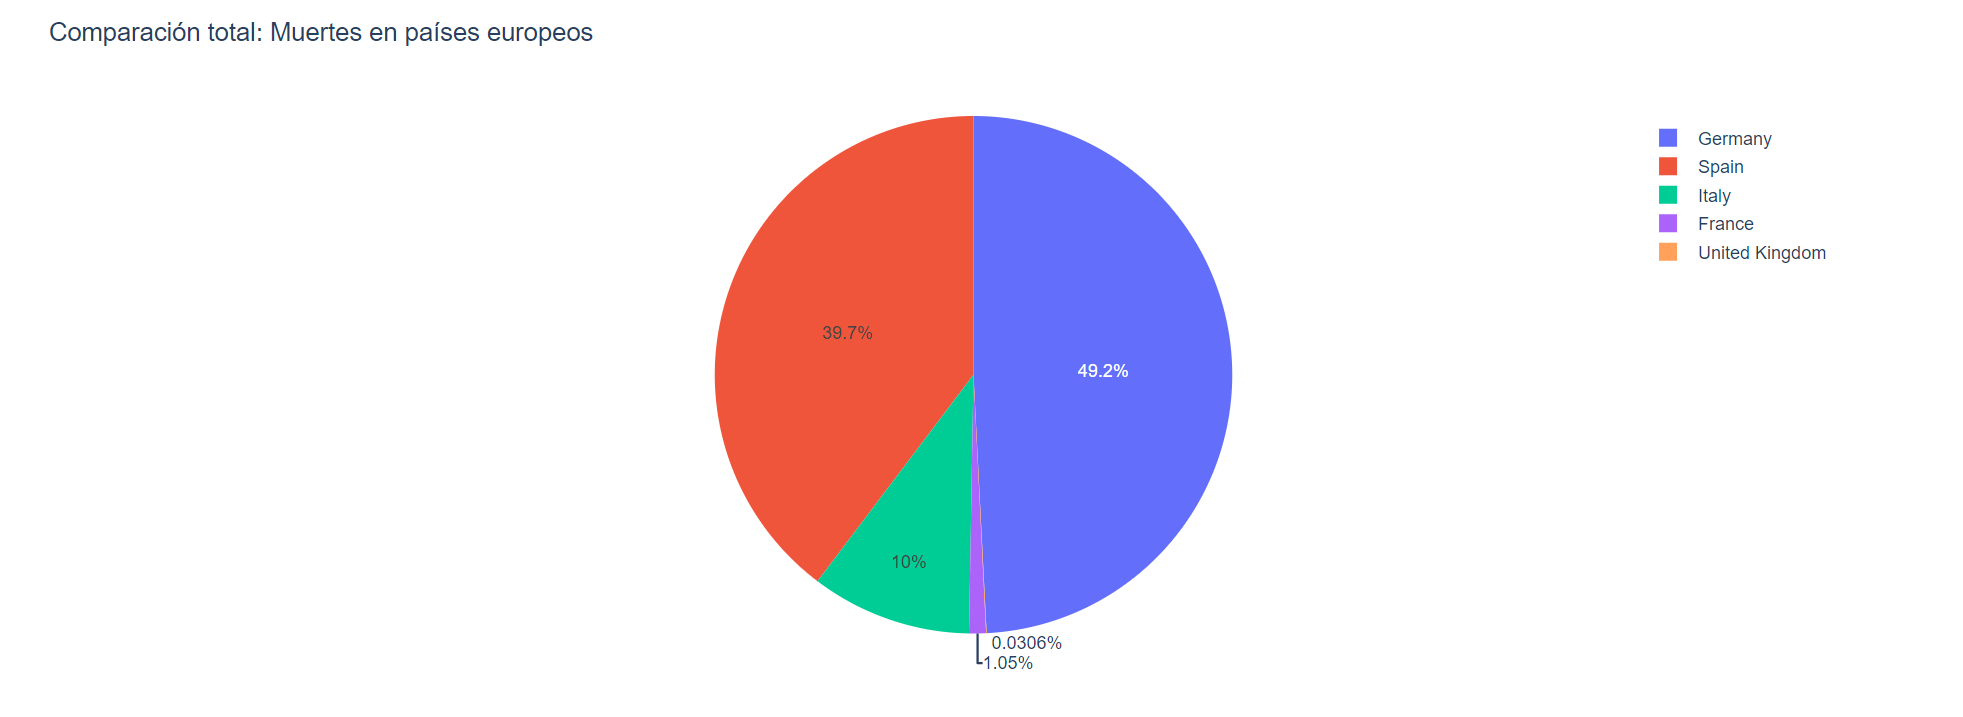

# **Análisis sobre las muertes por COVID-19:**

Esta imagen enseña un gráfico de dispersión con respecto a la tasa de fatalidad  por COVID-19, comparando entre si los siguientes paises : España,Italia, Francia ,Alemania.
En dónde, de esta imagen podemos analizar lo siguiente:

- El análisis  revela que Alemania representa el 49,2% de las muertes en países europeos, seguida por España con el 39,7%. En contraste, Italia, Francia y Reino Unido muestran porcentajes más bajos, con 10%, 1,05% y 0,0306% respectivamente.
- Aunque este gráfico proporciona una instantánea visual de la distribución de muertes, es importante considerar otros factores como la edad, el sexo y el estado socioeconómico que pueden influir en las tasas de mortalidad.


# **Conclusión sobre las muertes por COVID-19:**

- En conclusión, el análisis de las tasas de mortalidad en países europeos revela una distribución heterogénea, con Alemania y España destacándose por tener tasas más altas, mientras que Italia, Francia y Reino Unido muestran tasas más bajas. En las cuales, se identifican algunas observaciones específicas, como la alta tasa de mortalidad en Alemania, posiblemente relacionada con una población envejecida o factores de riesgo como el tabaquismo.
- Además, se sugiere que la situación económica en España podría contribuir a su elevada tasa de mortalidad. Por otro lado, Italia, Francia y Reino Unido exhiben tasas más bajas, lo que puede atribuirse a estilos de vida más saludables, sistemas de atención médica eficientes o una población más joven.
- Este análisis destaca la utilidad del gráfico circular para identificar áreas que requieren atención adicional y subraya la importancia de considerar múltiples factores al interpretar los datos de mortalidad.












In [13]:
# prompt:  diferentes  graficos tipo pastel de cada pais  para mi data para  comparar paises de europa con casos de muertes v/s confirmados , hacer un grafico pastel  que contenga todos estos paises con el total de datos

!pip install plotly
import plotly.graph_objects as go
import pandas as pd
# Retrieve data from the API
url = "https://coronavirus.m.pipedream.net"
response = requests.get(url)
data = response.json()["rawData"]

# Create a DataFrame with the data
df = pd.DataFrame(data)

# Filter data for European countries (replace with your desired countries)
european_countries = ['Spain', 'Italy', 'France', 'Germany', 'United Kingdom']
df_europe = df[df['Country_Region'].isin(european_countries)]

# Drop rows with missing values in 'Deaths' and 'Country_Region' columns
df_europe = df_europe.dropna(subset=['Deaths', 'Country_Region'])

# Remove duplicate rows based on 'Country_Region'
df_europe = df_europe.drop_duplicates(subset='Country_Region')

# Check if the DataFrame is empty after filtering
if df_europe.empty:
    print("Error: DataFrame is empty after filtering.")
    exit(1)

# Calculate total deaths and confirmed cases for each country
deaths_by_country = df_europe.groupby('Country_Region')['Deaths'].sum()
confirmed_by_country = df_europe.groupby('Country_Region')['Confirmed'].sum()

# Create labels and values for the pie charts
labels = deaths_by_country.index.to_list()
values_deaths = deaths_by_country.values.tolist()
values_confirmed = confirmed_by_country.values.tolist()

# Create pie charts for each country
for i, country in enumerate(labels):
    fig = go.Figure(data=[go.Pie(labels=['Muertes', 'Casos Confirmados'], values=[values_deaths[i], values_confirmed[i]])])

    fig.update_layout(
        title_text=f'Comparación Muertes vs Casos Confirmados en {country}',
        legend_title='',
        font_family="Arial",
        font_size=12,
    )

    #fig.show()

# Create a pie chart with total data for all European countries
fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_deaths)])

#fig_total.update_layout(
    #title_text='Comparación total: Muertes en países europeos',
    #legend_title='',
    #font_family="Arial",
    #font_size=12,
#)

#fig_total.show()

fig_total = go.Figure(data=[go.Pie(labels=labels, values=values_confirmed)])

fig_total.update_layout(
    title_text='Comparación total: Casos confirmados en países europeos',
    legend_title='',
    font_family="Arial",
    font_size=12,
)

fig_total.show()

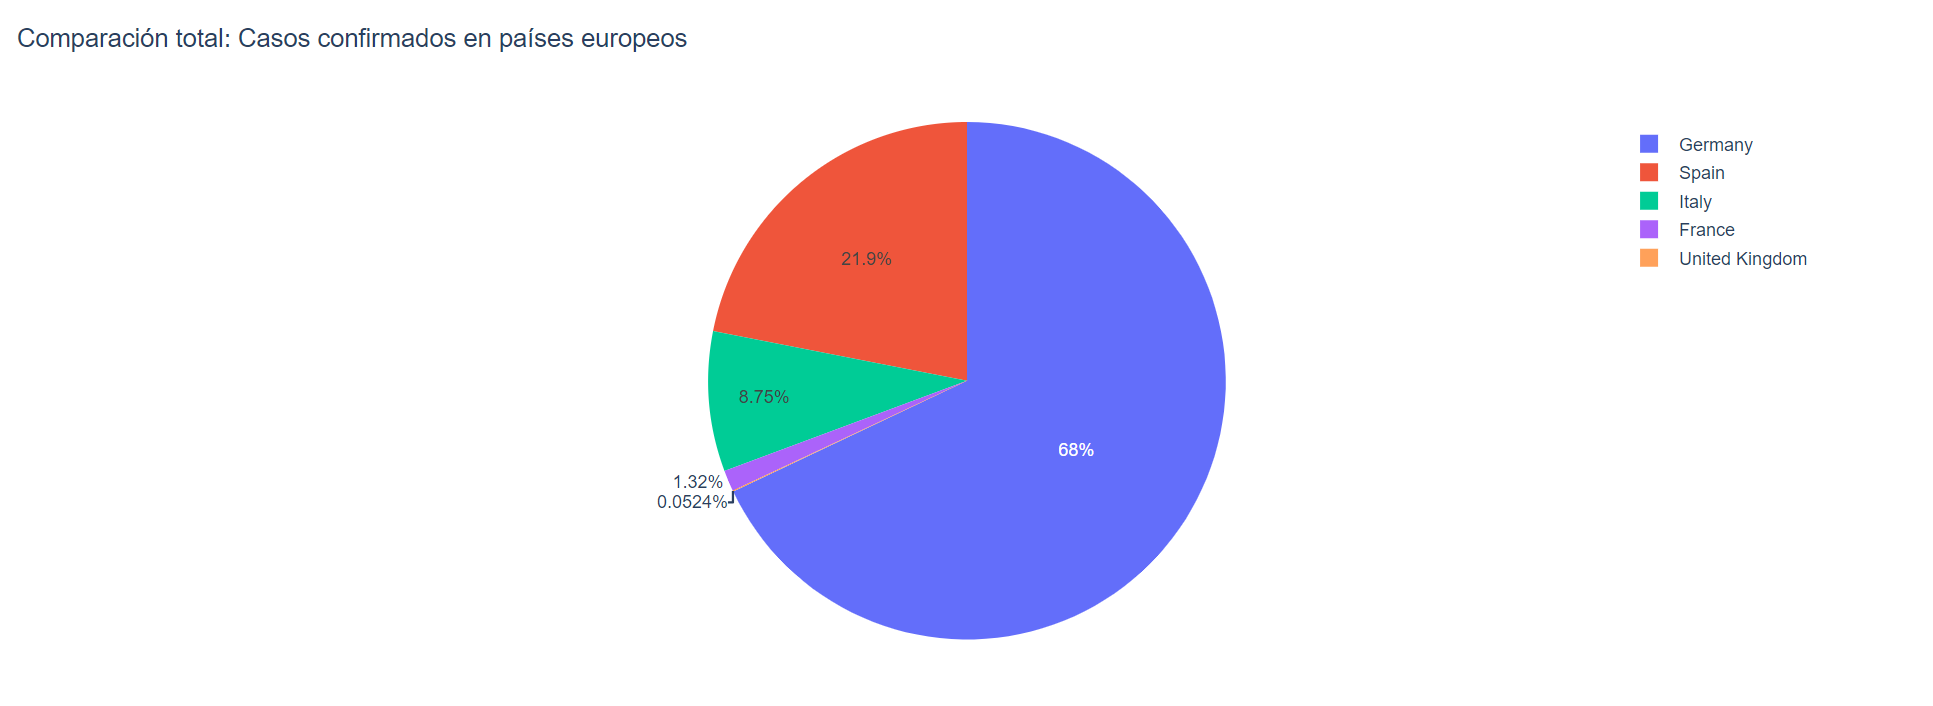

# **Análisis sobre los casos confirmados por COVID-19:**

Esta imagen enseña un gráfico de tipo “torta” en donde se comparan la cantidad de casos confirmados en paises europeos   por COVID-19 tales como : España,Italia,Francia,Alemania y Reino Unido .
En dónde, de esta imagen podemos analizar lo siguiente:

- El análisis de los porcentajes de casos confirmados de COVID-19 en varios países europeos revela una distribución dispar: Alemania lidera con el mayor porcentaje, con un 35,2%, seguido por España con un 21,9%, Italia con un 8,75%, Francia con un 1,32% y el Reino Unido con un 0,0524%.
- La alta prevalencia de casos en Alemania podría atribuirse a una combinación de factores, como su gran población, alta densidad poblacional o un amplio sistema de pruebas. E
- España sigue con el segundo mayor número de casos, posiblemente influenciado por su proximidad a Italia, uno de los primeros países afectados por la pandemia, además de factores similares a los de Alemania.
- Italia, Francia y el Reino Unido presentan cifras menores de casos confirmados, posiblemente debido a medidas de contención más estrictas, sistemas de salud más robustos o una población más joven.


# **Conclusión sobre los casos confirmados por COVID-19:**

- En conclusión el análisis detallado de los porcentajes de casos confirmados de COVID-19 en varios países europeos nos enseña sobre la diversidad de situaciones que enfrentan estas naciones en la gestión de la pandemia. Alemania destaca con el mayor porcentaje, lo que podría atribuirse a su población considerable y densidad demográfica, así como a la implementación temprana y extensa de pruebas de detección.
- España, en segundo lugar, podría estar influenciada por su proximidad a Italia, uno de los primeros epicentros del brote en Europa, y también por factores internos como la densidad de población y la movilidad.
- Italia, Francia y el Reino Unido presentan porcentajes menores, lo que sugiere una posible efectividad de sus medidas de contención, la robustez de sus sistemas de atención médica o una demografía más joven que puede estar influyendo en la propagación del virus.
- En resumen, este análisis resalta la importancia de considerar una variedad de factores, tanto internos como externos, al evaluar la situación de la pandemia en cada país, lo que permite una comprensión más completa y precisa de los desafíos y las necesidades específicas de cada contexto nacional.